2.**[30 points] Incomplete, Positive-Only Labels**

(a) We use the knowledge of probability:
\begin{align*}
p(y^{(i)}=1|x^{(i)}) &= p(t^{(i)}=1|x^{(i)})*p(y^{(i)}=1|t^{(i)}=1,x^{(i)})\\
                     &= p(t^{(i)}=1|x^{(i)})*p(y^{(i)}=1|t^{(i)}=1)
\end{align*}
So $\alpha = p(y^{(i)}=1|t^{(i)}=1)\in \mathbb{R}$.

(b) This subproblem uses result of subproblem (a), when $x^{(i)}\in V_+$, we have
\begin{align*}
h(x^{(i)}) &\approx p(y^{(i)}=1|x^{(i)}) \\
           &= p(y^{(i)}=1|t^{(i)}=1,x^{(i)}) * p(t^{(i)}=1|x^{(i)}) \\
           &= p(y^{(i)}=1|t^{(i)}=1) * p(t^{(i)}=1|x^{(i)}) \\
           &\approx \alpha * 1 \\
           &= \alpha
\end{align*}

(c)(d)(e)

Copy the definition of `LogisticRegression`

In [5]:
import numpy as np
import src.util as util
import matplotlib.pyplot as plt
from src.linear_model import LinearModel
# from src.p01b_logreg import LogisticRegression
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def h(self,theta,x):
        return 1/(1+np.exp(-x @ theta))

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        def H(theta):
            h_theta_x = np.reshape(self.h(theta,x),(-1,1))
            return 1/m * np.dot(x.T, (h_theta_x * (1-h_theta_x) * x))
        def fp(theta):
            return 1/m * x.T @ (self.h(theta,x)-y)

        
        m,n = x.shape
        theta = np.zeros(n)
        # print(H(theta))
        # print(fp(theta).shape)
        step = np.linalg.inv(H(theta))@fp(theta)
        while np.linalg.norm(step,1) > self.eps:
            theta = theta-step
            step = np.linalg.inv(H(theta))@fp(theta)
        self.theta = theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        # return self.h(self.theta,x) This is wrong!!!
        return x @ self.theta >= 0
        # *** END CODE HERE ***

`main` function and run:

There is a update of $\theta$ in sub-problem(e) after we get $\alpha$,
\begin{align*}
\frac{1}{1+e^{-\theta'^Tx}} &= \frac{1}{\alpha} \frac{1}{1+e^{-\theta^Tx}} \\
                            &\ge 0.5
\end{align*} 
Then 
\begin{equation*}
\theta'^Tx = \theta^Tx + \log{(\frac{2}{\alpha}-1)} \ge 0 \ \Longleftrightarrow \ \theta'_0 = \theta_0+\log{(\frac{2}{\alpha}-1)}
\end{equation*}

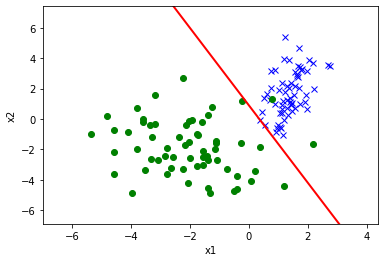

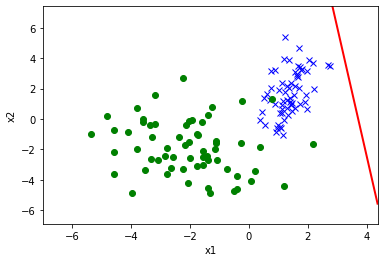

alpha=0.17174527161397443
The previous value of logreg_e.theta is [-2.91607451  0.78596649  0.09282768]
The updated value of logreg_e.theta is [-0.55096982  0.78596649  0.09282768]


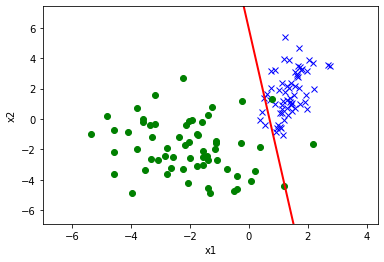

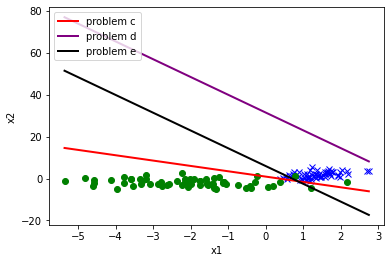

In [7]:
# Character to replace with sub-problem letter in plot_path/pred_path
WILDCARD = 'X'


def main(train_path, valid_path, test_path, pred_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    pred_path_c = pred_path.replace(WILDCARD, 'c')
    pred_path_d = pred_path.replace(WILDCARD, 'd')
    pred_path_e = pred_path.replace(WILDCARD, 'e')

    # *** START CODE HERE ***

    # Part (c): Train and test on true labels
    # Make sure to save outputs to pred_path_c
    x_train,t_train = util.load_dataset(train_path,label_col='t',add_intercept=True)
    logreg_c = LogisticRegression()
    logreg_c.fit(x_train,t_train)

    x_test, t_test = util.load_dataset(test_path,label_col='t',add_intercept=True)
    t_test_pred = logreg_c.predict(x_test)
    np.savetxt(pred_path, t_test_pred)
    util.plot(x_test, t_test, logreg_c.theta)
    plt.show()

    # Part (d): Train on y-labels and test on true labels
    # Make sure to save outputs to pred_path_d

    x_train,y_train = util.load_dataset(train_path,add_intercept=True)
    logreg_d = LogisticRegression()
    logreg_d.fit(x_train,y_train)

    x_test, t_test = util.load_dataset(test_path,label_col='t',add_intercept=True)
    t_test_pred = logreg_d.predict(x_test)
    np.savetxt(pred_path, t_test_pred)
    util.plot(x_test, t_test, logreg_d.theta)
    plt.show()

    # Part (e): Apply correction factor using validation set and test on true labels
    # Plot and use np.savetxt to save outputs to pred_path_e

    x_train,y_train = util.load_dataset(train_path,add_intercept=True)
    logreg_e = LogisticRegression()
    logreg_e.fit(x_train,y_train)

    x_eval, y_eval = util.load_dataset(valid_path,add_intercept=True)
    x_V_plus = x_eval[y_eval > 0]
    alpha = np.mean(logreg_e.h(logreg_e.theta,x_V_plus))
    print(f"alpha={alpha}")
    print(f"The previous value of logreg_e.theta is {logreg_e.theta}")
    logreg_e.theta[0] += np.log(2/alpha-1)
    print(f"The updated value of logreg_e.theta is {logreg_e.theta}")

    x_test, t_test = util.load_dataset(test_path,label_col='t',add_intercept=True)
    t_test_pred = logreg_e.predict(x_test) # 原来的表述是：logreg_e.h(logreg_e.theta,x_test) / alpha > 0.5
    np.savetxt(pred_path, t_test_pred)
    util.plot(x_test, t_test, logreg_e.theta)
    plt.show()

    util.plot3(x_test, t_test,theta_1=logreg_c.theta,legend_1="problem c",theta_2=logreg_d.theta,legend_2="problem d",theta_3=logreg_e.theta,legend_3="problem e")
    plt.savefig("./output/p02cde_ds3.pdf")

    # *** END CODER HERE

if __name__ == "__main__":
    train_path='./data/ds3_train.csv'
    valid_path='./data/ds3_valid.csv'
    test_path='./data/ds3_test.csv'
    pred_path='./output/p02X_pred.txt'
    main(train_path,valid_path,test_path,pred_path)